<a href="https://colab.research.google.com/github/praffuln/agentic-ai/blob/master/gw_agentic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# prompt: print hello world

print("hello world")

hello world


In [ ]:
!pip install google-generativeai tiktoken chromadb langgraph langchain langchain_community langchainhub ipykernel langchain_groq sentence_transformers boto3 langchain_aws docx exceptions langchain_openai
!pip install --upgrade python-docx

### Import dependencies

In [9]:
from typing import List, Any, Optional, TypedDict, Dict
from pydantic import BaseModel, Field, root_validator
from langchain_community.document_loaders import PyPDFLoader
from langchain.document_loaders import TextLoader
from langchain.llms import OpenAI
from langchain.schema import SystemMessage, HumanMessage
import boto3
from langchain_aws.chat_models.bedrock import ChatBedrock
from langgraph.graph import END, StateGraph, START
from docx import Document
import json

import re
from typing import Dict, List

## LLM

In [ ]:
from langchain_community.chat_models import BedrockChat
from langchain_community.embeddings import BedrockEmbeddings
import boto3
import os
from langchain_core.messages import HumanMessage, SystemMessage


os.environ["AZURE_OPENAI_API_KEY"] = "611dff392d7a4f3780f84060b3d6bc9e"
os.environ["OPENAI_API_KEY"] = "611dff392d7a4f3780f84060b3d6bc9e"


model_embedding="amazon.titan-embed-text-v1"
# bedrock_runtime = boto3.client('bedrock-runtime', region_name="us-east-1")
# embedding_model = BedrockEmbeddings(client=bedrock_runtime,model_id=model_embedding)


max_tokens = 1024*2*2
temperature = 0
top_k = 250
top_p = 1
model_id = "anthropic.claude-3-sonnet-20240229-v1:0"
version = "bedrock-2023-05-31"
pause_time = 30



from enum import Enum, auto
from abc import ABC, abstractmethod

class LLM(ABC):
    def __init__(self) -> None:
        super().__init__()

    @abstractmethod
    def operation(self):
        pass


class BedrockChatSonnet(LLM):

    def __init__(self) -> None:
        super().__init__()
        self.model = "model"

    def operation(self):
        #self.model.invoke() ##Like this.
        print('invoke to BedrockChatSonnet model !!!!!')


class BedrockChatHaiku(LLM):

    def __init__(self) -> None:
        super().__init__()
        self.model = "model2"

    def operation(self):
        #self.model.invoke() ##Like this.
        print('invoke to BedrockChatHaiku model !!!!!')

class LLMType(Enum):

    BedrockChatSonnet = auto()
    BedrockChatHaiku = auto()

    def some_method(self):
        return f"Method implemented for {self.name}"


# Creating a dictionary with enum members as keys
llm_objects_map = {
    LLMType.BedrockChatSonnet: BedrockChatSonnet(),
    LLMType.BedrockChatHaiku: BedrockChatHaiku()

}

class LllProvider:

    @staticmethod
    def provide(llm_type: LLMType) -> LLM:
        return llm_objects_map[llm_type]


class LLMInteractor(ABC):

    def __init__(self) -> None:
        pass

    @abstractmethod
    def interact(self, conversation_id, query):
        pass

    @abstractmethod
    def interact(self, query):
        pass

class LLMInteractorImpl(LLMInteractor):

    def __init__(self) -> None:
        super().__init__()
        self.prompManager = object
        self.conversation_memory = object
        self.llm_provider = LllProvider

    def interact(self, conversation_id, query) -> str:
        ## based on promptManager, conversation_memory and llm_provider get result from llm
        return f"LLM Result for conversation_id - {conversation_id} and query - {query}"


    def interact(self, query) -> str:
        ## based on promptManager, conversation_memory and llm_provider get result from llm
        return f"LLM Result for query - {query}"


if __name__ == "__main__":
   LllProvider.provide(LLMType.BedrockChatSonnet).operation()

### Graph Manager

In [4]:
from enum import Enum
from typing import Callable

def method1():
    return "method1 result"

def method2():
    return 42

def method3():
    print('Hello World')

class Tool(Enum):
    METHOD1 = ("method1", method1)
    METHOD2 = ("method2", method2)
    METHOD3 = ("method3", method3)

    def __init__(self, identifier: str, toolFunction: Callable[[], object]):
        self.identifier = identifier
        self.toolFunction = toolFunction

# Accessing METHOD1 and METHOD2 and calling their functions
tool1 = Tool.METHOD1
tool2 = Tool.METHOD2
tool3 = Tool.METHOD3

# print(f"Tool: {tool1.identifier}, Result: {tool1.toolFunction()}")
# print(f"Tool: {tool2.identifier}, Result: {tool2.toolFunction()}")
# print(f"Tool: {tool3.identifier}, Result: {tool3.toolFunction()}")


#### Iterate over all the values of tools
for tool in Tool:
    print(f"Tool: {tool.identifier}, Result: {tool.toolFunction()}")

####### create ToolList

Tool: method1, Result: method1 result
Tool: method2, Result: 42
Hello World
Tool: method3, Result: None


### Edge

In [7]:
class EdgeType(Enum):
    DIRECTED = "Directed"
    UNDIRECTED = "Undirected"


class Edge(Enum):

    EDGE_1 = (Tool.METHOD1, Tool.METHOD2, EdgeType.DIRECTED)
    EDGE_2 = (Tool.METHOD2, Tool.METHOD3, EdgeType.DIRECTED)

    def __init__(self, tool1: Tool, tool2: Tool, edge_type: EdgeType):
        self.tool1 = tool1
        self.tool2 = tool2
        self.edge_type = edge_type

    def __str__(self):
        return f"Edge({self.tool1.identifier}, {self.tool2.identifier}, {self.edge_type.value})"


#### Iterate over all the values of edges
for edge in Edge:
  print(edge)



Edge(method1, method2, Directed)
Edge(method2, method3, Directed)


### Agentstate

In [11]:
class AgentState(TypedDict):
    input_text: str
    GreenWashingWords: List
    Sentences: List
    Actions: List
    flagged_keywords_sentences : List
    flagged_sentences : List
    unflagged_keywords_sentences: List
    ChangedSentence: List
    corrected_proposals : dict
    unflagged_proposals : dict
    verified_text : str
    greenwashing_percentage : List

    identification: dict
    verification: dict
    OriginalSentence: List[str]
    verification_results: dict

### graph setup

### Tool List




In [20]:
# Function to identify greenwashing terms
def identify_tool(state: AgentState):
    print("-------------------Starting Indetify tool----------------")
    input_text = state["input_text"]
    GreenWashingWords = ["Green", "Washing", "Words"]
    Sentences = ["Identify tool state AgentState...."]

    return {"GreenWashingWords":GreenWashingWords, "Sentences":Sentences}



# Function to verify greenwashing
def verify_greenwashing(state: AgentState):
    input_text = state["input_text"]
    GreenWashingWords = state["GreenWashingWords"]
    Sentences = state["Sentences"]
    Actions = ["actions1", "actions2"]

    return {"GreenWashingWords":GreenWashingWords, "Sentences":Sentences, "Actions":Actions}


# Function to verify greenwashing
def get_flagged_keywords(state: AgentState):
    GreenWashingWords = state["GreenWashingWords"]
    Sentences = state["Sentences"]
    Actions = state["Actions"]
    flagged_keywords_sentences = ["flagged", "keywords", "sentences"]
    flagged_sentences = ["flagged", "sentences"]


    return {"flagged_keywords_sentences":flagged_keywords_sentences,
            "flagged_sentences":flagged_sentences}


# Function to get unflagged keywords sentences
def get_unflagged_keywords_sentences(state: AgentState):
    GreenWashingWords = state["GreenWashingWords"]
    Sentences = state["Sentences"]
    Actions = state["Actions"]
    unflagged_keywords_sentences = ["unflagged", "keywords", "sentences"]

    return {"unflagged_keywords_sentences":unflagged_keywords_sentences}


# Function to get correct propose tool
def correct_propose_tool(state: AgentState):
    flagged_keywords_sentences = state["flagged_keywords_sentences"]
    corrected_proposals  = {}
    corrected_proposal = ["corrected", "proposal"]

    return {"corrected_proposals":corrected_proposals}


## Function to correct grammar tool
def correct_grammar_tool(state: AgentState):
    corrected_proposals  = state["corrected_proposals"]

    return {"corrected_proposals":corrected_proposals}

## Function to unflagged proposal tool
def unflagged_proposal_tool(state: AgentState):
    unflagged_keywords_sentences = state["unflagged_keywords_sentences"]
    unflagged_proposals = ["unflagged", "proposals"]

    return {"unflagged_proposals":unflagged_proposals}


## Function for verifier tool
def verifier_tool(state: AgentState):
    input_text = state["input_text"]
    corrected_proposals = state["corrected_proposals"]
    print(corrected_proposals)
    unflagged_proposals = state["unflagged_proposals"]
    print(unflagged_proposals)
    greenwashing_percentage = state["greenwashing_percentage"]
    print(greenwashing_percentage)
    verified_text = "verified_text"
    print("-------------verifier_tool Function ended--------------")
    return {"verified_text":verified_text,
            "corrected_proposals":corrected_proposals,
            "unflagged_proposals":unflagged_proposals,
            "greenwashing_percentage":greenwashing_percentage,
            }


## function calculate_greenwashing_percentage
def calculate_greenwashing_percentage(state: AgentState):
    Sentences = state["Sentences"]
    input_text = state["input_text"]
    greenwashing_percentage = [12]

    return {"greenwashing_percentage":greenwashing_percentage}


## function change_state_variables
def change_state_variables(state: AgentState):
    if "verified_text" in state:
        verified_text = state["verified_text"]
        return {"input_text": verified_text}
    else:
        raise KeyError("Key2 'verified_text' not found in state")

In [21]:
def setup_workflow():
    workflow = StateGraph(AgentState)

    workflow.add_node("identify_tool", identify_tool)
    workflow.add_node("verify_greenwashing", verify_greenwashing)
    workflow.add_node("get_flagged_keywords", get_flagged_keywords)
    workflow.add_node("get_unflagged_keywords_sentences", get_unflagged_keywords_sentences)
    workflow.add_node("correct_propose_tool", correct_propose_tool)
    workflow.add_node("correct_grammar_tool", correct_grammar_tool)
    workflow.add_node("unflagged_proposal_tool", unflagged_proposal_tool)
    workflow.add_node("verifier_tool", verifier_tool)
    workflow.add_node("calculate_greenwashing_percentage", calculate_greenwashing_percentage)
    workflow.add_node("change_state_variables", change_state_variables)


    workflow.add_edge(START, "identify_tool")
    workflow.add_edge("identify_tool", "verify_greenwashing")
    workflow.add_edge("verify_greenwashing", "calculate_greenwashing_percentage")
    workflow.add_edge("calculate_greenwashing_percentage", "get_unflagged_keywords_sentences")
    workflow.add_edge("get_unflagged_keywords_sentences", "unflagged_proposal_tool")
    workflow.add_edge("unflagged_proposal_tool", "get_flagged_keywords")
    workflow.add_edge("get_flagged_keywords", "correct_propose_tool")
    workflow.add_edge("correct_propose_tool", "correct_grammar_tool")
    workflow.add_edge("correct_grammar_tool", "verifier_tool")

   #  workflow.add_conditional_edges("verifier_tool",
   #                                 continue_or_not_func,
   #                              #    {"continue":"change_state_variables",
   #                                 {"continue":END,
   #                                  "end":END}
   #                                 )
    # workflow.add_edge("change_state_variables", END)
    # workflow.add_edge("change_state_variables", "identify_tool")
    workflow.add_edge("verifier_tool", END)

    graph = workflow.compile()
    return graph

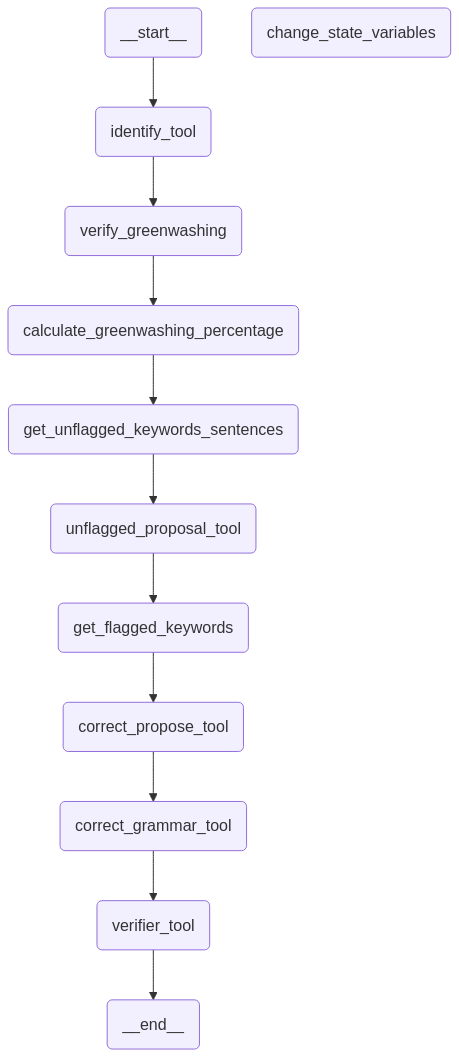

In [22]:
graph = setup_workflow()

# print the workflow
from IPython.display import Image, display # type: ignore
display(Image(graph.get_graph(xray=True).draw_mermaid_png()))

### Refactored Graph Manager

#### Copy tools again in a class

In [144]:
class ToolBox:

  llm = "llm_interactor"
  promptManager = "promptManager"
  s3Loader = "s3Loader"

  # Function to identify greenwashing terms
  def identify_tool(state: AgentState):
      print("-------------------Starting Indetify tool----------------", ToolBox.llm, ToolBox.promptManager, ToolBox.s3Loader)
      input_text = state["input_text"]
      GreenWashingWords = ["Green", "Washing", "Words"]
      Sentences = ["Identify tool state AgentState...."]

      return {"GreenWashingWords":GreenWashingWords, "Sentences":Sentences}



  # Function to verify greenwashing
  def verify_greenwashing(state: AgentState):
      print("-------------------Starting verify_greenwashing tool----------------")
      input_text = state["input_text"]
      GreenWashingWords = state["GreenWashingWords"]
      Sentences = state["Sentences"]
      Actions = ["actions1", "actions2"]

      return {"GreenWashingWords":GreenWashingWords, "Sentences":Sentences, "Actions":Actions}


  # Function to verify greenwashing
  def get_flagged_keywords(state: AgentState):
      print("-------------------Starting get_flagged_keywords tool----------------")
      GreenWashingWords = state["GreenWashingWords"]
      Sentences = state["Sentences"]
      Actions = state["Actions"]
      flagged_keywords_sentences = ["flagged", "keywords", "sentences"]
      flagged_sentences = ["flagged", "sentences"]


      return {"flagged_keywords_sentences":flagged_keywords_sentences,
              "flagged_sentences":flagged_sentences}


  # Function to get unflagged keywords sentences
  def get_unflagged_keywords_sentences(state: AgentState):
      print("-------------------Starting get_unflagged_keywords_sentences tool----------------")
      GreenWashingWords = state["GreenWashingWords"]
      Sentences = state["Sentences"]
      Actions = state["Actions"]
      unflagged_keywords_sentences = ["unflagged", "keywords", "sentences"]

      return {"unflagged_keywords_sentences":unflagged_keywords_sentences}


  # Function to get correct propose tool
  def correct_propose_tool(state: AgentState):
      print("-------------------Starting correct_propose_tool tool----------------")
      flagged_keywords_sentences = state["flagged_keywords_sentences"]
      corrected_proposals  = {}
      corrected_proposal = ["corrected", "proposal"]

      return {"corrected_proposals":corrected_proposals}


  ## Function to correct grammar tool
  def correct_grammar_tool(state: AgentState):
      print("-------------------Starting correct_grammar_tool tool----------------")
      corrected_proposals  = state["corrected_proposals"]

      return {"corrected_proposals":corrected_proposals}

  ## Function to unflagged proposal tool
  def unflagged_proposal_tool(state: AgentState):
      print("-------------------Starting unflagged_proposal_tool tool----------------")
      unflagged_keywords_sentences = state["unflagged_keywords_sentences"]
      unflagged_proposals = ["unflagged", "proposals"]

      return {"unflagged_proposals":unflagged_proposals}


  ## Function for verifier tool
  def verifier_tool(state: AgentState):
      print("-------------------Starting verifier_tool tool----------------")
      input_text = state["input_text"]
      corrected_proposals = state["corrected_proposals"]
      print(corrected_proposals)
      unflagged_proposals = state["unflagged_proposals"]
      print(unflagged_proposals)
      greenwashing_percentage = state["greenwashing_percentage"]
      print(greenwashing_percentage)
      verified_text = "verified_text"
      print("-------------verifier_tool Function ended--------------")
      return {"verified_text":verified_text,
              "corrected_proposals":corrected_proposals,
              "unflagged_proposals":unflagged_proposals,
              "greenwashing_percentage":greenwashing_percentage,
              }


  ## function calculate_greenwashing_percentage
  def calculate_greenwashing_percentage(state: AgentState):
      print("-------------------Starting calculate_greenwashing_percentage tool----------------")
      Sentences = state["Sentences"]
      input_text = state["input_text"]
      greenwashing_percentage = [12]

      return {"greenwashing_percentage":greenwashing_percentage}


  ## function change_state_variables
  def change_state_variables(state: AgentState):
      print("-------------------Starting change_state_variables tool----------------")
      if "verified_text" in state:
          verified_text = state["verified_text"]
          return {"input_text": verified_text}
      else:
          raise KeyError("Key2 'verified_text' not found in state")

### Create tools enum

In [145]:
from enum import Enum
from typing import Callable

class Tool(Enum):

    IDENTITY_TOOL = ("identify_tool", ToolBox.identify_tool)
    VERIFY_GREENWASHING = ("verify_greenwashing", ToolBox.verify_greenwashing)
    GET_FLAGGED_KEYWORDS = ("get_flagged_keywords", ToolBox.get_flagged_keywords)
    GET_UNFLAGGED_KEYWORDS_SENTENCES = ("get_unflagged_keywords_sentences", ToolBox.get_unflagged_keywords_sentences)
    CORRECT_PROPOSE_TOOL = ("correct_propose_tool", ToolBox.correct_propose_tool)
    CORRECT_GRAMMER_TOOL = ("correct_grammar_tool", ToolBox.correct_grammar_tool)
    UNFLAGGED_PROPOSAL_TOOL = ("unflagged_proposal_tool", ToolBox.unflagged_proposal_tool)
    VERIFIER_TOOL = ("verifier_tool", ToolBox.verifier_tool)
    CALCULATE_GREENWASHING_PERCENTAGE = ("calculate_greenwashing_percentage", ToolBox.calculate_greenwashing_percentage)
    CHANGE_STATE_VARIABLES = ("change_state_variables", ToolBox.change_state_variables)

    def __init__(self, identifier: str, toolFunction: Callable[[Dict[str, Any]], Dict[str, Any]]):
        self.identifier = identifier
        self.toolFunction = toolFunction


# Accessing CALCULATE_GREENWASHING_PERCENTAGE
tool1 = Tool.CALCULATE_GREENWASHING_PERCENTAGE
tool2 = Tool.VERIFIER_TOOL


#### Iterate over all the values of tools
for tool in Tool:
    # Create a dummy state for demonstration purposes
    # You'll need to replace this with your actual state management logic
    dummy_state = {"input_text": "This is a test input."}
    print(f"Tool: {tool.identifier}")


Tool: identify_tool
Tool: verify_greenwashing
Tool: get_flagged_keywords
Tool: get_unflagged_keywords_sentences
Tool: correct_propose_tool
Tool: correct_grammar_tool
Tool: unflagged_proposal_tool
Tool: verifier_tool
Tool: calculate_greenwashing_percentage
Tool: change_state_variables


### Edge

In [146]:
class EdgeType(Enum):
    DIRECTED = "Directed"
    CONDITIONAL = "Conditional"


class Edge(Enum):

    IDENTITY_TOOL_TO_VERIFY_GREENWASHING_EDGE = (Tool.IDENTITY_TOOL, Tool.VERIFY_GREENWASHING, EdgeType.DIRECTED)
    VERIFY_GREENWASHING_TO_CALCULATE_GREENWASHING_PERCENTAGE = (Tool.VERIFY_GREENWASHING, Tool.CALCULATE_GREENWASHING_PERCENTAGE, EdgeType.DIRECTED)
    CALCULATE_GREENWASHING_PERCENTAGE_TO_GET_UNFLAGGED_KEYWORDS_SENTENCES = (Tool.CALCULATE_GREENWASHING_PERCENTAGE, Tool.GET_UNFLAGGED_KEYWORDS_SENTENCES, EdgeType.DIRECTED)

    GET_UNFLAGGED_KEYWORDS_SENTENCES_TO_UNFLAGGED_PROPOSAL_TOOL = (Tool.GET_UNFLAGGED_KEYWORDS_SENTENCES, Tool.UNFLAGGED_PROPOSAL_TOOL, EdgeType.DIRECTED)
    UNFLAGGED_PROPOSAL_TOOL_TO_GET_FLAGGED_KEYWORDS = (Tool.UNFLAGGED_PROPOSAL_TOOL, Tool.GET_FLAGGED_KEYWORDS, EdgeType.DIRECTED)
    GET_FLAGGED_KEYWORDS_TO_CORRECT_PROPOSE_TOOL = (Tool.GET_FLAGGED_KEYWORDS, Tool.CORRECT_PROPOSE_TOOL, EdgeType.DIRECTED)
    CORRECT_PROPOSE_TOOL_TO_CORRECT_GRAMMER_TOOL = (Tool.CORRECT_PROPOSE_TOOL, Tool.CORRECT_GRAMMER_TOOL, EdgeType.DIRECTED)

    CORRECT_GRAMMER_TOOL_TO_VERIFIER_TOOLL = (Tool.CORRECT_GRAMMER_TOOL, Tool.VERIFIER_TOOL, EdgeType.DIRECTED)

    def __init__(self, tool1: Tool, tool2: Tool, edge_type: EdgeType):
        self.tool1 = tool1
        self.tool2 = tool2
        self.edge_type = edge_type

    def __str__(self):
        return f"Edge({self.tool1.identifier}, {self.tool2.identifier}, {self.edge_type.value})"


#### Iterate over all the values of edges
for edge in Edge:
  print(edge)


Edge(identify_tool, verify_greenwashing, Directed)
Edge(verify_greenwashing, calculate_greenwashing_percentage, Directed)
Edge(calculate_greenwashing_percentage, get_unflagged_keywords_sentences, Directed)
Edge(get_unflagged_keywords_sentences, unflagged_proposal_tool, Directed)
Edge(unflagged_proposal_tool, get_flagged_keywords, Directed)
Edge(get_flagged_keywords, correct_propose_tool, Directed)
Edge(correct_propose_tool, correct_grammar_tool, Directed)
Edge(correct_grammar_tool, verifier_tool, Directed)


### Graph Manager

In [154]:
class Graph :

    def __init__(self):
        self.nodes = Tool
        self.edges = Edge

    def __construct_nodes(self, workflow):
        for node in self.nodes:
          workflow.add_node(node.identifier, node.toolFunction)

    def __construct_edges(self, workflow):

        ### construct first edge from Start
        first_edge = list(Edge)[0]
        workflow.add_edge(START, first_edge.tool1.identifier)

        ### construct rest of the edges
        for edge in self.edges:
            if(edge.edge_type == EdgeType.DIRECTED):
               workflow.add_edge(edge.tool1.identifier, edge.tool2.identifier)

        #add last edge to the END
        last_edge = list(Edge)[-1]
        workflow.add_edge(last_edge.tool2.identifier, END)



    def setup_workflow(self, agentState: AgentState):
        workflow = StateGraph(agentState)

        self.__construct_nodes(workflow)
        self.__construct_edges(workflow)


        graph = workflow.compile()
        return graph


from abc import ABC, abstractmethod

class GraphProvider(ABC):

    @abstractmethod
    def provide_graph(self):
        pass

class GraphProviderImpl(GraphProvider):

    def provide_graph(self)-> Graph:
        return Graph().setup_workflow(AgentState)




### app.py

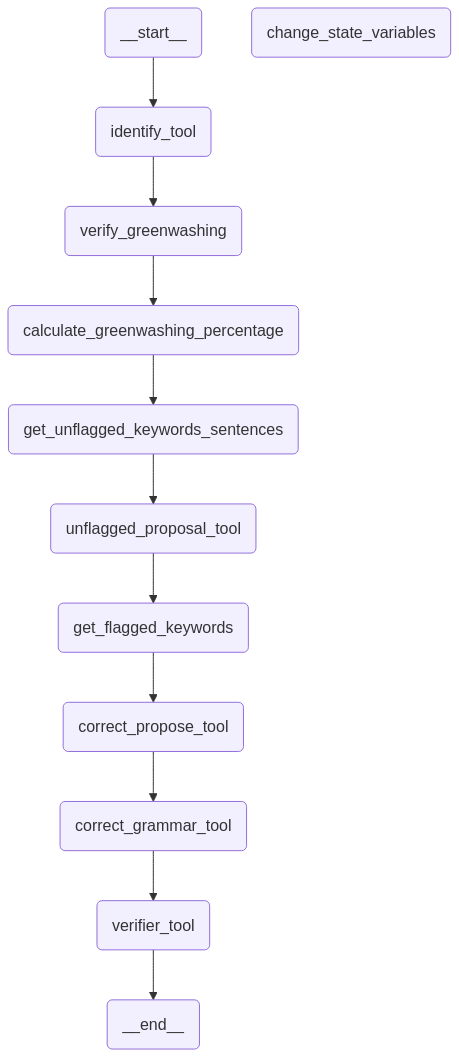

-------------------Starting Indetify tool---------------- llm_interactor promptManager s3Loader
-------------------Starting verify_greenwashing tool----------------
-------------------Starting calculate_greenwashing_percentage tool----------------
-------------------Starting get_unflagged_keywords_sentences tool----------------
-------------------Starting unflagged_proposal_tool tool----------------
-------------------Starting get_flagged_keywords tool----------------
-------------------Starting correct_propose_tool tool----------------
-------------------Starting correct_grammar_tool tool----------------
-------------------Starting verifier_tool tool----------------
{}
['unflagged', 'proposals']
[12]
-------------verifier_tool Function ended--------------


{'input_text': 'input for text',
 'GreenWashingWords': ['Green', 'Washing', 'Words'],
 'Sentences': ['Identify tool state AgentState....'],
 'Actions': ['actions1', 'actions2'],
 'flagged_keywords_sentences': ['flagged', 'keywords', 'sentences'],
 'flagged_sentences': ['flagged', 'sentences'],
 'unflagged_keywords_sentences': ['unflagged', 'keywords', 'sentences'],
 'corrected_proposals': {},
 'unflagged_proposals': ['unflagged', 'proposals'],
 'verified_text': 'verified_text',
 'greenwashing_percentage': [12]}

In [157]:
graph = GraphProviderImpl().provide_graph()

# print the workflow
from IPython.display import Image, display # type: ignore
display(Image(graph.get_graph(xray=True).draw_mermaid_png()))



input = {
    "input_text" : "input for text",
}

answer = graph.invoke(input)
answer

#### More classes

S3 loader

Prompt Manager

